In [1]:
#Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
from wordcloud import WordCloud
import os
import conda
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib
from mpl_toolkits.basemap import Basemap

#Setting display rows to Max

pd.set_option('display.max_rows', None)

In [2]:
#Reading CSV files

df_business = pd.read_csv('df_business.csv',low_memory=False)

In [3]:
#Checking dataframes

df_business.tail()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
209388,9Q0fPWAjUweoFDk0kafuzQ,Nishi Sushi,9750 Weston Road,Vaughan,ON,L4H 2P2,43.838555,-79.559823,4.0,5,0,"{'Ambience': ""{'romantic': False, 'intimate': ...","Japanese, Sushi Bars, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
209389,PotiAhtDMYMNsJCzV0oLAw,Walmart,3240 Wilkinson Blvd,Charlotte,NC,28208,35.226307,-80.893539,2.0,13,0,"{'RestaurantsPriceRange2': '1', 'BusinessParki...","Department Stores, Food, Mobile Phones, Fashio...",NaN
209390,SYa2j1boLF8DcGVOYfHPcA,Five Guys,7014-590 E Camelback Rd,Scottsdale,AZ,85251,33.504062,-111.929431,3.5,97,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","American (New), Food, Burgers, Restaurants, Fa...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
209391,RSSIsgO00OuWQTRoITacpA,Indian Trail Dog Training,NaN,Indian Trail,NC,28079,35.101965,-80.599385,5.0,3,1,NaN,"Pet Services, Pet Training, Pets","{'Monday': '0:0-0:0', 'Tuesday': '7:0-19:0', '..."
209392,tOcYmewXFhQeZh3V42ymwg,Kudlow Ye,"21 St Clair Avenue E, Suite 401",Toronto,ON,M4T 1L9,43.688214,-79.392756,5.0,3,1,NaN,"Tax Services, Professional Services, Accountan...","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ..."


In [4]:
#Understanding the dataframe

df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209393 entries, 0 to 209392
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   209393 non-null  object 
 1   name          209392 non-null  object 
 2   address       200714 non-null  object 
 3   city          209391 non-null  object 
 4   state         209393 non-null  object 
 5   postal_code   208884 non-null  object 
 6   latitude      209393 non-null  float64
 7   longitude     209393 non-null  float64
 8   stars         209393 non-null  float64
 9   review_count  209393 non-null  int64  
 10  is_open       209393 non-null  int64  
 11  attributes    180348 non-null  object 
 12  categories    208869 non-null  object 
 13  hours         164550 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 22.4+ MB


In [5]:
#Keeping data for only the ones which are open

df_business=df_business[df_business['is_open']==1]

In [6]:
#Checking the dataframe again

df_business.info()

#This is to remove unwanted data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168903 entries, 0 to 209392
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   168903 non-null  object 
 1   name          168902 non-null  object 
 2   address       161090 non-null  object 
 3   city          168901 non-null  object 
 4   state         168903 non-null  object 
 5   postal_code   168458 non-null  object 
 6   latitude      168903 non-null  float64
 7   longitude     168903 non-null  float64
 8   stars         168903 non-null  float64
 9   review_count  168903 non-null  int64  
 10  is_open       168903 non-null  int64  
 11  attributes    143470 non-null  object 
 12  categories    168401 non-null  object 
 13  hours         137502 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 19.3+ MB


In [7]:
#Creating new dataframe for restaurants

df_business_restaurants=pd.DataFrame()

In [8]:
#Selecting rows having 'Restaurants' in their categories

df_business_restaurants=df_business[df_business['categories'].astype(str).str.contains('Restaurant')]

In [9]:
#Checking restaurants dataframe

df_business_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43980 entries, 8 to 209390
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   43980 non-null  object 
 1   name          43980 non-null  object 
 2   address       43633 non-null  object 
 3   city          43980 non-null  object 
 4   state         43980 non-null  object 
 5   postal_code   43903 non-null  object 
 6   latitude      43980 non-null  float64
 7   longitude     43980 non-null  float64
 8   stars         43980 non-null  float64
 9   review_count  43980 non-null  int64  
 10  is_open       43980 non-null  int64  
 11  attributes    42818 non-null  object 
 12  categories    43980 non-null  object 
 13  hours         37543 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 5.0+ MB


In [10]:
#Checking restaurants dataframe

df_business_restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,1,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Ethnic Food, Food Trucks, Specialty Food, Impo...","{'Monday': '11:30-14:30', 'Tuesday': '11:30-14..."
24,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,4.5,4,1,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Cheesesteaks, Poutineries","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
25,lu7vtrp_bE9PnxWfA8g4Pg,Banzai Sushi,300 John Street,Thornhill,ON,L3T 5W4,43.820492,-79.398466,4.5,7,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Japanese, Fast Food, Food Court, Restaurants",NaN
30,9sRGfSVEfLhN_km60YruTA,Apadana Restaurant,13071 Yonge Street,Richmond Hill,ON,L4E 1A5,43.947011,-79.454862,3.0,3,1,"{'Ambience': ""{'touristy': False, 'hipster': F...","Persian/Iranian, Turkish, Middle Eastern, Rest...","{'Tuesday': '12:0-21:0', 'Wednesday': '12:0-21..."
33,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,"4550 East Cactus Rd, #KSFC-4",Phoenix,AZ,85032,33.602822,-111.983533,4.0,10,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Food, Pretzels, Bakeries, Fast Food, Restaurants","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."


In [11]:
#are all business Id's unique?

df_business_restaurants['business_id'].is_unique

#All business IDs are unique

True

In [12]:
#Checking distribution of the restaurants across states/regions

df_business_restaurants['state'].value_counts().head(20)

ON     11087
AZ      7877
NV      5314
QC      4678
OH      4349
NC      3317
PA      3012
AB      2371
WI      1185
IL       461
SC       297
NY        12
TX         3
CA         3
BC         2
CO         2
AL         1
HI         1
HPL        1
NE         1
Name: state, dtype: int64

In [13]:
#Keeping only restaurants based out of the states in the USA

US_states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
df_business_restaurants=df_business_restaurants[df_business_restaurants['state'].isin(US_states)]

In [14]:
#Checking state column

df_business_restaurants['state'].value_counts().head(20)

AZ    7877
NV    5314
OH    4349
NC    3317
PA    3012
WI    1185
IL     461
SC     297
NY      12
TX       3
CA       3
CO       2
VT       1
HI       1
FL       1
NE       1
AL       1
VA       1
OR       1
WA       1
Name: state, dtype: int64

In [15]:
#Checking business dataframe again

df_business_restaurants.info()

#No of rows decreased

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25840 entries, 8 to 209390
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   25840 non-null  object 
 1   name          25840 non-null  object 
 2   address       25546 non-null  object 
 3   city          25840 non-null  object 
 4   state         25840 non-null  object 
 5   postal_code   25810 non-null  object 
 6   latitude      25840 non-null  float64
 7   longitude     25840 non-null  float64
 8   stars         25840 non-null  float64
 9   review_count  25840 non-null  int64  
 10  is_open       25840 non-null  int64  
 11  attributes    25527 non-null  object 
 12  categories    25840 non-null  object 
 13  hours         22895 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 3.0+ MB


In [16]:
#Checking the cities

df_business_restaurants['city'].value_counts().head(20)

Las Vegas          4383
Phoenix            2770
Charlotte          2033
Pittsburgh         1750
Cleveland          1075
Scottsdale          947
Mesa                845
Madison             741
Tempe               658
Henderson           600
Chandler            566
Glendale            524
Gilbert             428
Champaign           275
Peoria              272
North Las Vegas     262
Concord             247
Surprise            175
Gastonia            170
Goodyear            150
Name: city, dtype: int64

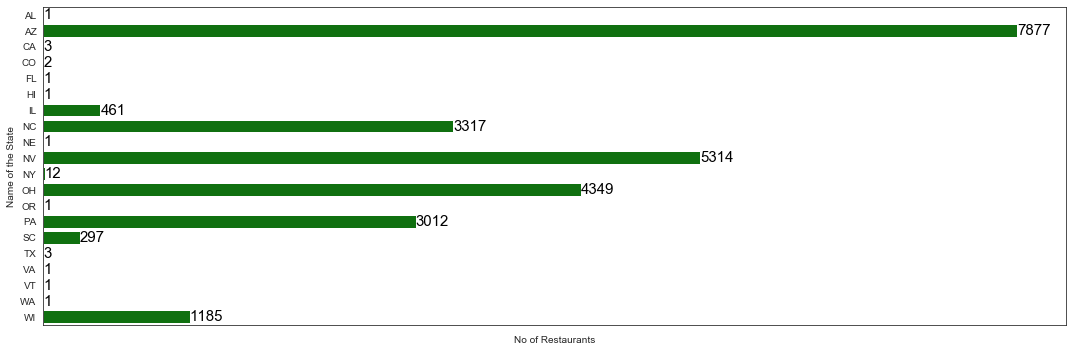

In [17]:
#Plotting no of restaurants in the state

plt.figure(figsize=(15,5))
x1=df_business_restaurants.groupby('state').count()
fig1=sns.barplot(y=x1.index,x='name',data=x1,color='g')
fig1.set_ylabel('Name of the State')
fig1.set_xlabel('No of Restaurants')

#Rotating the x-labels to avoid overlapping

fig1.set_xticklabels(fig1.get_xticklabels(), rotation=40, ha="right")

#Assigning sales value at the top of the bars

for p in fig1.patches:
    fig1.text(p.get_width(), p.get_y() + p.get_height()/2., '%d' % int(p.get_width()), 
            fontsize=15, color='black', ha='left', va='center')

plt.tight_layout() 

In [18]:
#Finding popular restaurant names

df_business_restaurants['name'].value_counts().head(20)

Subway Restaurants        609
McDonald's                536
Taco Bell                 294
Burger King               273
Wendy's                   232
Pizza Hut                 232
Jack in the Box           182
Chipotle Mexican Grill    168
Jimmy John's              157
Domino's Pizza            145
Panda Express             145
Panera Bread              138
Arby's                    133
Papa John's Pizza         128
KFC                       127
Starbucks                 104
Chick-fil-A               103
Little Caesars Pizza      100
Jersey Mike's Subs         99
Denny's                    93
Name: name, dtype: int64

In [19]:
#Checking no of values in star rating

df_business_restaurants['stars'].value_counts()

4.0    6449
3.5    5439
3.0    4042
4.5    3648
2.5    2630
2.0    1860
1.5     832
5.0     745
1.0     195
Name: stars, dtype: int64

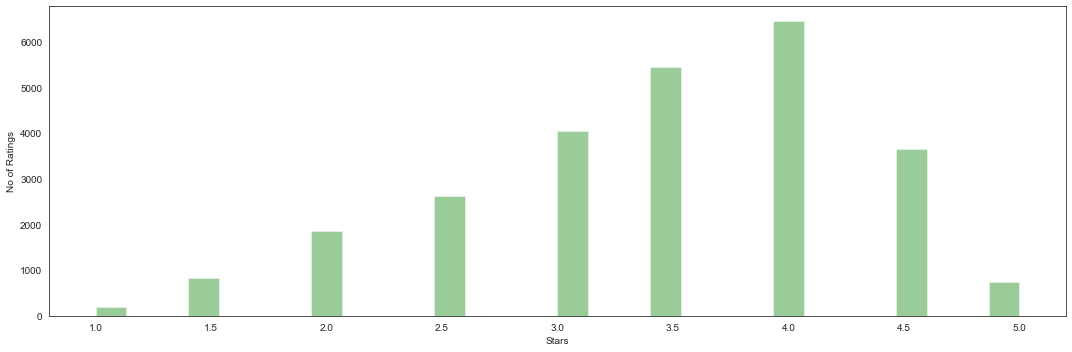

In [20]:
#Plotting distribution of star rating

plt.figure(figsize=(15,5))
fig1=sns.distplot(df_business_restaurants['stars'],bins=30,kde=False,color='g')
fig1.set_ylabel('No of Ratings')
fig1.set_xlabel('Stars')
plt.tight_layout() 

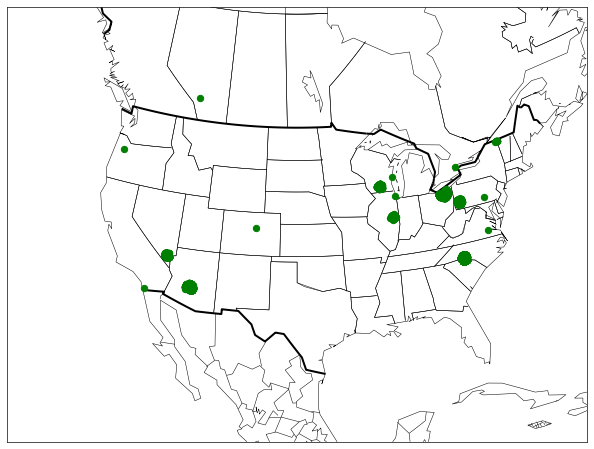

In [21]:
#Geographical representation of resturants on US map

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


fig = plt.figure(figsize=(12, 8))
m = Basemap(width=6000000,height=4500000,resolution='c',projection='aea',lat_1=35.,lat_2=45,lon_0=-100,lat_0=40)
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='white')
m.drawcountries(linewidth=2, linestyle='solid', color='k' ) 
m.drawstates(linewidth=0.5, linestyle='solid', color='k')
lons,lats = m(df_business_restaurants['longitude'].tolist(),df_business_restaurants['latitude'].tolist())
m.scatter(lons,lats,s=40,zorder=5,color='green')
plt.show()

(-0.5, 1439.5, 1079.5, -0.5)

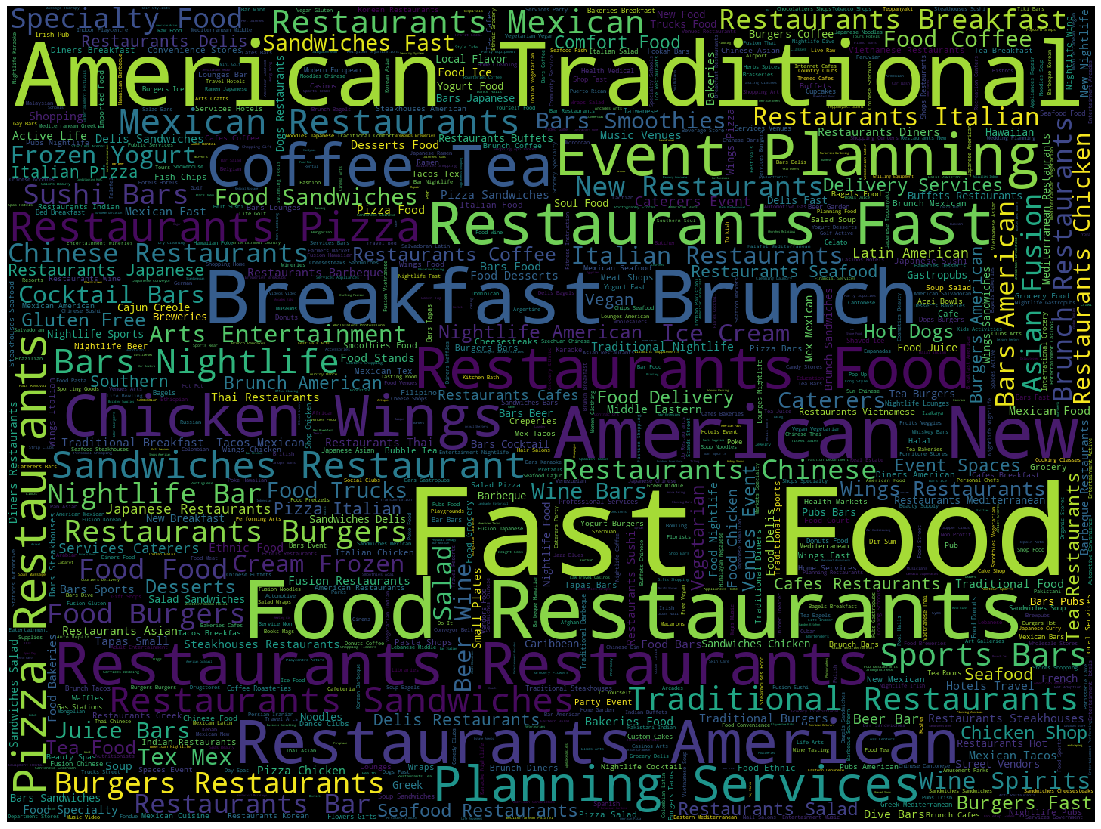

In [22]:
#Plotting word cloud of category data to evaluate the popular restautant categories

cloud = WordCloud(width=1440, height= 1080,max_words= 1000).generate(' '.join(df_business_restaurants['categories'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [23]:
#Creating CSV file to save business_id for the restaurants

df_restaurant_business_id = df_business_restaurants[['business_id','name','city','state','review_count','stars']]
df_restaurant_business_id.to_csv('df_restaurant_business_id.csv',index=False)

In [24]:
#top 50 most reviewed restaurants

df_business_restaurants[['name', 'review_count', 'city', 'stars']].sort_values(ascending=False, by="review_count")[0:50]

,name,review_count,city,stars
81545,Bacchanal Buffet,10129,Las Vegas,4.0
118008,Mon Ami Gabi,9264,Las Vegas,4.0
147379,Wicked Spoon,7383,Las Vegas,3.5
83020,Hash House A Go Go,6751,Las Vegas,4.0
95962,Earl of Sandwich,5232,Las Vegas,4.5
22754,Yardbird Southern Table & Bar,4828,Las Vegas,4.5
205740,The Buffet At Wynn,4803,Las Vegas,3.5
145294,Secret Pizza,4803,Las Vegas,4.0
77432,The Cosmopolitan of Las Vegas,4740,Las Vegas,4.0
89281,Gordon Ramsay Hell's Kitchen,4672,Las Vegas,4.5
